In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
solos_df = pd.read_csv('wrangled_train_solos_df.csv', index_col=0)

In [3]:
solos_df.head()

,Id,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,315c96c26c9aac,0,0,100.00,0,0,45,0,1,1,...,1560,0.0,0,0.00,0,0,49.75,2,0,0.1875
1,311b84c6ff4390,0,0,8.54,0,0,48,1000,0,0,...,-1,2004.0,0,0.00,0,0,1089.00,6,1500,0.7370
2,b7807186e3f679,0,1,324.20,1,5,5,986,4,1,...,-1,1228.0,0,76.80,0,0,2050.00,6,1462,0.8750
3,92022479b92ce7,0,3,254.20,0,12,13,0,2,1,...,1536,2368.0,0,15.29,0,0,1787.00,3,0,0.8213
4,47143f942503e0,0,0,136.90,0,0,37,0,1,1,...,1500,0.0,0,0.00,0,0,270.80,1,0,0.3474


In [4]:
solos_df.describe()

,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,...,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,...,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000
mean,0.060911,1.060325,118.633610,0.247729,1.013273,47.496291,447.312046,0.931581,0.474193,21.526636,...,966.902338,463.387331,0.005117,5.090264,0.011450,0.004514,955.432587,3.583660,557.157886,0.487390
std,0.285385,1.799858,165.469255,0.648921,2.405053,27.716368,595.075806,1.571316,0.562464,46.526939,...,744.253353,1374.161065,0.088000,34.209275,0.106389,0.069638,1069.792064,2.579846,728.765955,0.298442
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.400000,2.000000,0.000000,0.229200
50%,0.000000,0.000000,74.200000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,...,1496.000000,0.000000,0.000000,0.000000,0.000000,0.000000,502.800000,3.000000,0.000000,0.484000
75%,0.000000,2.000000,169.100000,0.000000,1.000000,71.000000,1090.000000,1.000000,1.000000,20.810000,...,1517.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1587.000000,5.000000,1492.000000,0.747600
max,21.000000,28.000000,5480.000000,26.000000,63.000000,100.000000,1970.000000,48.000000,18.000000,1002.000000,...,2857.000000,40700.000000,18.000000,1974.000000,1.000000,5.000000,25780.000000,153.000000,1922.000000,1.000000


In [5]:
solos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719935 entries, 0 to 719934
Data columns (total 24 columns):
Id                 719935 non-null object
assists            719935 non-null int64
boosts             719935 non-null int64
damageDealt        719935 non-null float64
headshotKills      719935 non-null int64
heals              719935 non-null int64
killPlace          719935 non-null int64
killPoints         719935 non-null int64
kills              719935 non-null int64
killStreaks        719935 non-null int64
longestKill        719935 non-null float64
matchDuration      719935 non-null int64
maxPlace           719935 non-null int64
numGroups          719935 non-null int64
rankPoints         719935 non-null int64
rideDistance       719935 non-null float64
roadKills          719935 non-null int64
swimDistance       719935 non-null float64
teamKills          719935 non-null int64
vehicleDestroys    719935 non-null int64
walkDistance       719935 non-null float64
weaponsAcquired  

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [7]:
X = solos_df.drop(['Id', 'winPlacePerc'], axis=1)
y = solos_df['winPlacePerc']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [9]:
linreg = LinearRegression()

In [10]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
coef_df = pd.DataFrame(linreg.coef_, X.columns, columns=['Coefficient'])
coef_df

,Coefficient
assists,0.028018
boosts,0.011680
damageDealt,0.000042
headshotKills,0.008753
heals,0.000064
killPlace,-0.008768
killPoints,-0.000082
kills,-0.024402
killStreaks,-0.189508
longestKill,-0.000093


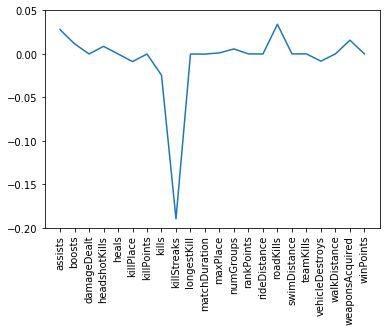

In [12]:
plt.plot(range(len(coef_df.index)), coef_df['Coefficient'])
plt.xticks(range(len(coef_df.index)), coef_df.index, rotation=90)
plt.ylim(-.2, .05)
plt.show()

In [13]:
predict = linreg.predict(X_test)

In [14]:
training_accuracy = linreg.score(X_train, y_train)
test_accuracy = linreg.score(X_test, y_test)

print(f"Accuracy on training data: {training_accuracy}")
print(f"Accuracy on test data:     {test_accuracy}")

Accuracy on training data: 0.8830392823545725
Accuracy on test data:     0.8802941415447147


Pretty good accuracy on both training and testing data. No signs of overfitting which means it will generalize to new data well.

In [15]:
linreg_compare = y_test.to_frame()

In [16]:
linreg_compare = linreg_compare.reset_index().drop('index', axis=1)
linreg_compare.head()

,winPlacePerc
0,0.7020
1,0.1458
2,0.7350
3,0.4375
4,0.9680


In [17]:
predict = pd.Series(predict)
linreg_compare['predict'] = predict
linreg_compare.head(10)

,winPlacePerc,predict
0,0.7020,0.730638
1,0.1458,0.116776
2,0.7350,0.759328
3,0.4375,0.361094
4,0.9680,0.955137
5,0.3684,0.304490
6,0.9375,0.786005
7,0.6533,0.582709
8,0.6090,0.560711
9,0.2268,0.185694


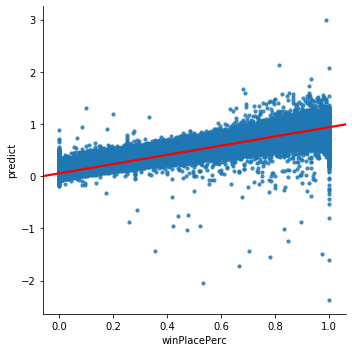

In [18]:
sns.lmplot('winPlacePerc', 'predict', data=linreg_compare, line_kws={'color': 'red'}, scatter_kws={'s': 10})

Good linear trend between the prediction and y_test. However it seems that the model has decided it is okay to go above a 1 win place percentage and below a 0 win place percentage. Niether of which make any sense. Let's take a look at just the predictions between 0 and 1

(0, 1)

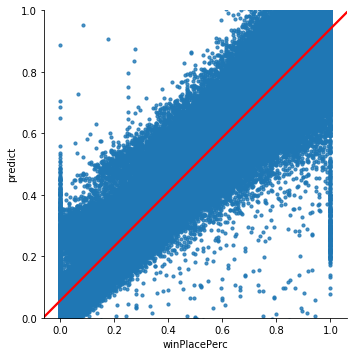

In [19]:
sns.lmplot('winPlacePerc', 'predict', data=linreg_compare, line_kws={'color': 'red'}, scatter_kws={'s': 10})
plt.ylim((0,1))

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
%%time
cv_results_5 = cross_val_score(linreg, X, y, cv=5)

Wall time: 2.69 s


In [22]:
%%time
cv_results_10 = cross_val_score(linreg, X, y, cv=10)

Wall time: 5.84 s


In [23]:
%%time
cv_results_25 = cross_val_score(linreg, X, y, cv=25)

Wall time: 15.3 s


In [24]:
print(cv_results_5)
print(cv_results_10)
print(cv_results_25)

[0.88272631 0.88174437 0.88167085 0.88020261 0.88486074]
[0.88305813 0.88240337 0.88129044 0.882195   0.88145301 0.88194639
 0.87624585 0.88441259 0.88583275 0.88391994]
[0.87990025 0.88578488 0.88142734 0.88199048 0.88447715 0.88054027
 0.8815555  0.87919097 0.88396057 0.88332342 0.88142937 0.88250509
 0.88161366 0.87862496 0.88449936 0.87239638 0.87907369 0.88375534
 0.88368469 0.88361718 0.88287002 0.88658621 0.8865031  0.88537551
 0.88303629]


In [25]:
print(f'Average 5-fold cross validation score:  {np.mean(cv_results_5)}')
print(f'Average 10-fold cross validation score: {np.mean(cv_results_10)}')
print(f'Average 25-fold cross validation score: {np.mean(cv_results_25)}')

Average 5-fold cross validation score:  0.8822409755705403
Average 10-fold cross validation score: 0.8822757479514912
Average 25-fold cross validation score: 0.8823088663930033


Before we get into Lasso and Ridge regression, we need to figure out what value of alpha will be best for both models

In [26]:
models = [Lasso, Ridge]
alphas = [0.01, 0.1, .5, .75, 1, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
mse_frame = pd.DataFrame(index=alphas)

for model in models:
    mse_values = []
    for alpha in alphas:
        model_base = model(alpha=alpha)
        model_fit = model_base.fit(X_train, y_train)
        model_predict = model_base.predict(X_test)
        mse = mean_squared_error(y_test, model_predict)
        mse_values.append(mse)
    if model == Lasso:
        mse_frame['Lasso_mse'] = mse_values
    if model == Ridge:
        mse_frame['Ridge_mse'] = mse_values

In [27]:
mse_frame

,Lasso_mse,Ridge_mse
0.01,0.012063,0.010675
0.10,0.015687,0.010675
0.50,0.018686,0.010675
0.75,0.019358,0.010675
1.00,0.020558,0.010675
10.00,0.028720,0.010675
50.00,0.032327,0.010675
100.00,0.039226,0.010675
200.00,0.065419,0.010674
300.00,0.089179,0.010674


In [28]:
best_lasso_alpha = mse_frame['Lasso_mse'].idxmin()
best_ridge_alpha = mse_frame['Ridge_mse'].idxmin()
print(best_lasso_alpha, best_ridge_alpha)

0.01 1000.0


With alpha values picked out, it's time to test how Lasso and Ridge regression compare to the Linear regression model.

In [29]:
lasso = Lasso(alpha=best_lasso_alpha)
lasso_fit = lasso.fit(X_train, y_train)

In [30]:
lasso_coef = lasso_fit.coef_
lasso_coeff_df = pd.DataFrame(lasso_coef, X.columns, columns=['Coefficient'])
lasso_coeff_df

,Coefficient
assists,0.000000
boosts,0.005917
damageDealt,-0.000163
headshotKills,-0.000000
heals,0.000000
killPlace,-0.006320
killPoints,-0.000088
kills,-0.000000
killStreaks,-0.065945
longestKill,-0.000195


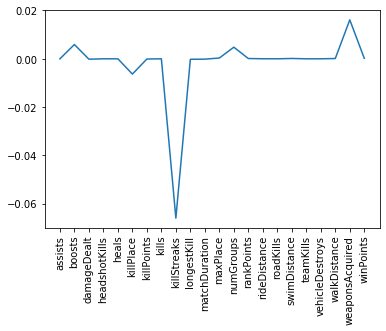

In [31]:
names = solos_df.drop(['Id', 'winPlacePerc'], axis=1).columns
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=90)
plt.ylim(-.07, .02)
plt.show()

In [32]:
lasso_pred = lasso.predict(X_test)
lasso_pred = pd.Series(lasso_pred)

In [33]:
lasso_compare = y_test.to_frame()
lasso_compare = lasso_compare.reset_index().drop('index', axis=1)
lasso_compare['Lasso Predict'] = lasso_pred
lasso_compare.head()

,winPlacePerc,Lasso Predict
0,0.7020,0.714523
1,0.1458,0.116219
2,0.7350,0.721838
3,0.4375,0.323879
4,0.9680,0.942539


In [34]:
lasso_compare['Lasso Predict'].max(), lasso_compare['Lasso Predict'].min()

(3.5168042032271245, -0.7341444349771004)

Still having problems with numbers going over 1 and below 0 for predicting winPlacePerc, and it's gotten worse with the Lasso regression.

In [35]:
training_accuracy = lasso.score(X_train, y_train)
test_accuracy = lasso.score(X_test, y_test)

print(f"Accuracy on training data: {training_accuracy}")
print(f"Accuracy on test data:     {test_accuracy}")

Accuracy on training data: 0.8653146183082241
Accuracy on test data:     0.8647296106525554


Lasso regression is actually doing worse than the linear regression model, at only 82% accuracy compared to the 88% linear regression gave us.

Right away, just by testing the accuracy of these models, we can see that the Linear Regression model is doing better. However, that is not the only way to tell how well the model is doing. Mean squared error and root mean squared error are two other ________ to give us an idea on how accurate our model is. Let's take a look at the MSE and RMSE of the linear regression model and lasso model

In [36]:
linreg_mse = mean_squared_error(y_test, predict)
linreg_rmse = linreg_mse ** (1/2)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = lasso_mse ** (1/2)

In [37]:
print(f'Linear Regression MSE:  {linreg_mse}')
print(f'Linear Regression RMSE: {linreg_rmse}')
print('\n')
print(f'Lasso Regression MSE:   {lasso_mse}')
print(f'Lasso Regression RMSE:  {lasso_rmse}')

Linear Regression MSE:  0.010675189158929364
Linear Regression RMSE: 0.10332080699902302


Lasso Regression MSE:   0.012063210710989532
Lasso Regression RMSE:  0.10983264865689771


Overall, it seems that the base linear regression model is a better fit for the data. Lower MSE and RMSE scores are better, and the linear regression model gave us a lower number for both metrics. Now what about Ridge regression? Will that do any better than Lasso?

In [38]:
ridge = Ridge(alpha=best_ridge_alpha)
ridge_fit = ridge.fit(X_train, y_train)

In [39]:
ridge_coef = ridge_fit.coef_
ridge_coeff_df = pd.DataFrame(ridge_coef, X.columns, columns=['Coefficient'])
ridge_coeff_df

,Coefficient
assists,0.026967
boosts,0.011732
damageDealt,0.000043
headshotKills,0.008590
heals,0.000062
killPlace,-0.008681
killPoints,-0.000082
kills,-0.024742
killStreaks,-0.184677
longestKill,-0.000095


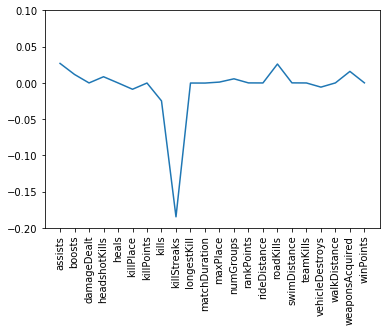

In [40]:
names = solos_df.drop(['Id', 'winPlacePerc'], axis=1).columns
plt.plot(range(len(names)), ridge_coef)
plt.xticks(range(len(names)), names, rotation=90)
plt.ylim(-.2, .1)
plt.show()

In [41]:
ridge_pred = ridge.predict(X_test)
ridge_pred = pd.Series(ridge_pred)
ridge_compare = y_test.to_frame()
ridge_compare = ridge_compare.reset_index().drop('index', axis=1)
ridge_compare['Ridge Predict'] = ridge_pred
ridge_compare.head()

,winPlacePerc,Ridge Predict
0,0.7020,0.729131
1,0.1458,0.116805
2,0.7350,0.757327
3,0.4375,0.360244
4,0.9680,0.954917


In [42]:
training_accuracy = ridge.score(X_train, y_train)
test_accuracy = ridge.score(X_test, y_test)

print(f"Accuracy on training data: {training_accuracy}")
print(f"Accuracy on test data:     {test_accuracy}")

Accuracy on training data: 0.8830156591175778
Accuracy on test data:     0.8803437781494184


In [43]:
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = ridge_mse ** (1/2)

In [44]:
print(f'Linear Regression MSE:  {linreg_mse}')
print(f'Linear Regression RMSE: {linreg_rmse}')
print('\n')
print(f'Lasso Regression MSE:   {lasso_mse}')
print(f'Lasso Regression RMSE:  {lasso_rmse}')
print('\n')
print(f'Ridge Regression MSE:   {ridge_mse}')
print(f'Ridge Regression RMSE:  {ridge_rmse}')

Linear Regression MSE:  0.010675189158929364
Linear Regression RMSE: 0.10332080699902302


Lasso Regression MSE:   0.012063210710989532
Lasso Regression RMSE:  0.10983264865689771


Ridge Regression MSE:   0.010670762640868706
Ridge Regression RMSE:  0.1032993835454438


Seems like a toss up between Linear regression and Ridge regression, both outdoing Lasso regression.

What about other types of regressors? KNN regression and Random Forest regression exist, so let's look in to those and see how those compare to linear, ridge, and lasso regression.